## Week-10 Time Series-SMA

In [1]:
!pip install tabulate

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [3]:
myticker = ['AMZN']
#tickers = ['AAPL','WMT','META','AMZN']

df = pdr.get_data_yahoo(myticker, start='2022-1-18')['Close']
df.columns = {'Close Price'}
df.head(10)

[*********************100%***********************]  1 of 1 completed


Date
2022-01-18 00:00:00-05:00    158.917496
2022-01-19 00:00:00-05:00    156.298996
2022-01-20 00:00:00-05:00    151.667496
2022-01-21 00:00:00-05:00    142.643005
2022-01-24 00:00:00-05:00    144.544006
2022-01-25 00:00:00-05:00    139.985992
2022-01-26 00:00:00-05:00    138.872498
2022-01-27 00:00:00-05:00    139.637497
2022-01-28 00:00:00-05:00    143.977997
2022-01-31 00:00:00-05:00    149.573502
Name: Close, dtype: float64

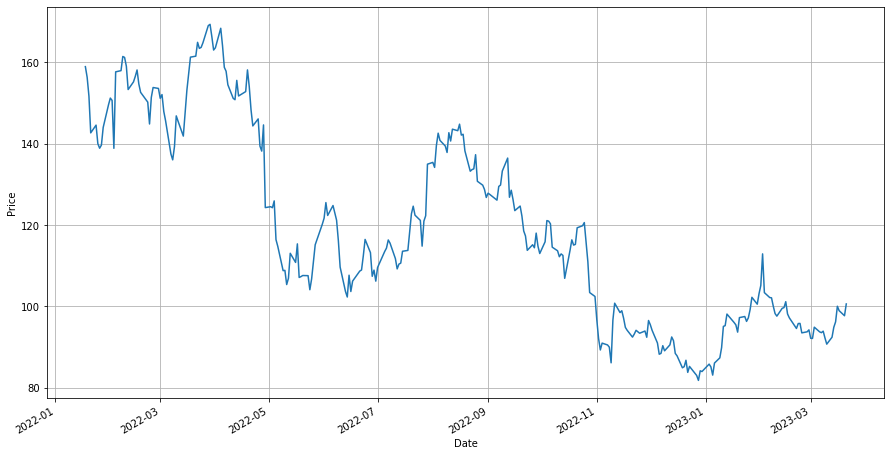

In [4]:
df.plot(figsize =(15,8))
plt.grid()
plt.ylabel("Price")
plt.show()

In [5]:
df = pd.DataFrame(df)
df

,Close
Date,
2022-01-18 00:00:00-05:00,158.917496
2022-01-19 00:00:00-05:00,156.298996
2022-01-20 00:00:00-05:00,151.667496
2022-01-21 00:00:00-05:00,142.643005
2022-01-24 00:00:00-05:00,144.544006
...,...
2023-03-15 00:00:00-04:00,96.199997
2023-03-16 00:00:00-04:00,100.040001
2023-03-17 00:00:00-04:00,98.949997


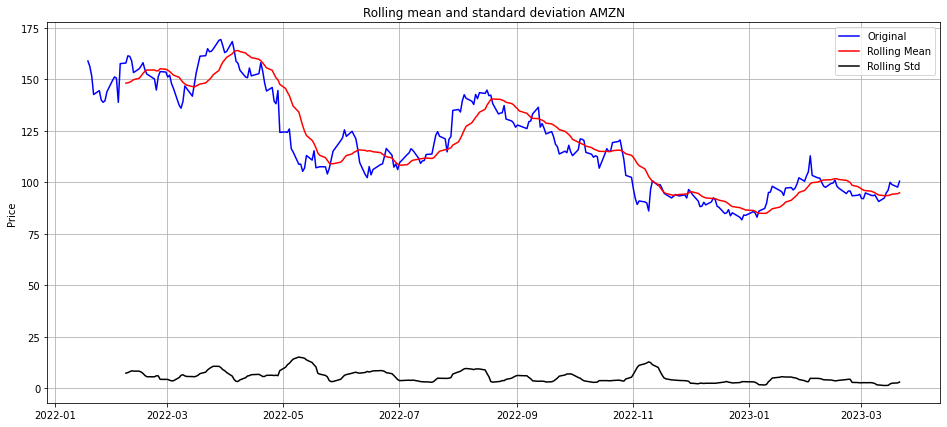

In [6]:
rolling_mean = df['Close'].rolling(15).mean()
rolling_std = df['Close'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'AMZN')
plt.grid()
plt.ylabel("Price")
plt.show()


In [7]:
# create 20 days simple moving average column
df['SMA20'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['SMA50'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df.head()

,Close,SMA20,SMA50
Date,,,
2022-01-18 00:00:00-05:00,158.917496,158.917496,158.917496
2022-01-19 00:00:00-05:00,156.298996,157.608246,157.608246
2022-01-20 00:00:00-05:00,151.667496,155.627996,155.627996
2022-01-21 00:00:00-05:00,142.643005,152.381748,152.381748
2022-01-24 00:00:00-05:00,144.544006,150.814200,150.814200


### Trade signals
- When the short term moving average crosses above the long term moving average, this indicates a buy signal.
- Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell.

In [8]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)

In [9]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

,Close,SMA20,SMA50,Signal,Position
Date,,,,,
2022-01-18 00:00:00-05:00,158.917496,158.917496,158.917496,0.0,NaN
2022-01-19 00:00:00-05:00,156.298996,157.608246,157.608246,0.0,0.0
2022-01-20 00:00:00-05:00,151.667496,155.627996,155.627996,0.0,0.0
2022-01-21 00:00:00-05:00,142.643005,152.381748,152.381748,0.0,0.0
2022-01-24 00:00:00-05:00,144.544006,150.814200,150.814200,0.0,0.0


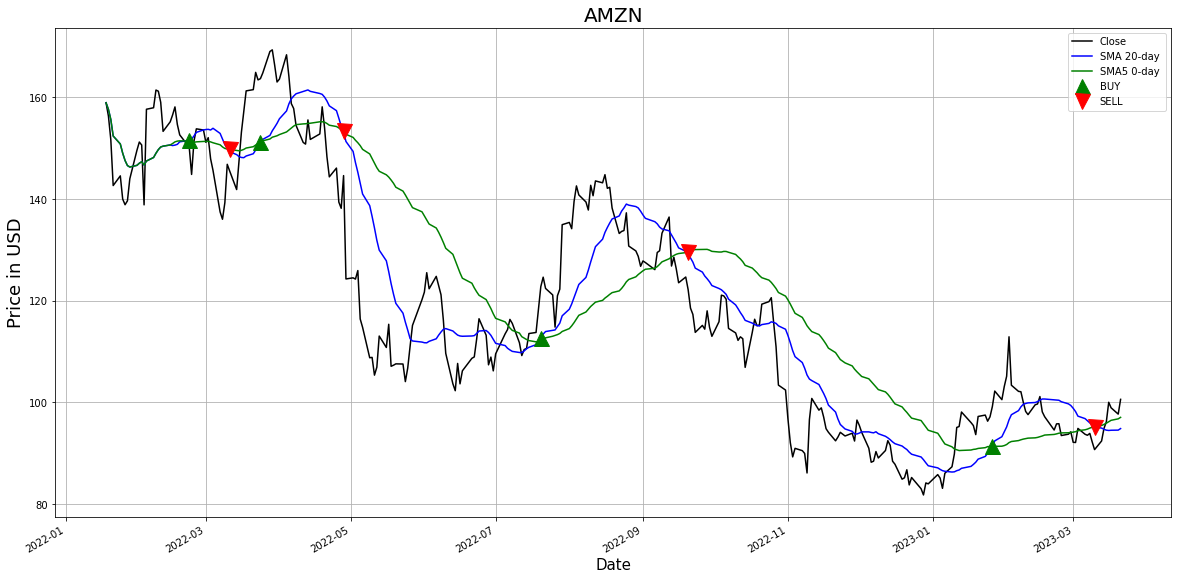

In [10]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close') 
df['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title('AMZN', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [11]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------------+---------+----------+----------+----------+------------+
| Date                      |   Close |    SMA20 |    SMA50 |   Signal | Position   |
|---------------------------+---------+----------+----------+----------+------------|
| 2022-02-22 00:00:00-05:00 | 150.197 | 151.52   | 151.379  |        1 | Buy        |
| 2022-03-11 00:00:00-05:00 | 145.525 | 149.294  | 149.732  |        0 | Sell       |
| 2022-03-24 00:00:00-04:00 | 163.65  | 151.171  | 151.151  |        1 | Buy        |
| 2022-04-28 00:00:00-04:00 | 144.596 | 153.244  | 153.389  |        0 | Sell       |
| 2022-07-20 00:00:00-04:00 | 122.77  | 112.658  | 112.115  |        1 | Buy        |
| 2022-09-20 00:00:00-04:00 | 122.19  | 129.161  | 129.667  |        0 | Sell       |
| 2023-01-26 00:00:00-05:00 |  99.22  |  91.4275 |  91.2976 |        1 | Buy        |
| 2023-03-10 00:00:00-05:00 |  90.73  |  95.222  |  95.2588 |        0 | Sell       |
+---------------------------+---------+----------+----